In [180]:
import numpy as np

In [181]:
def dilser(low=0.001, limit=100.0, dilfactor = 2.0):
    """Returns a list containing a dilution series that ranges from
    "low" to "limit" by "dilfactor".
    """
    a = [low]
    while a[-1] <= limit:
        a.append(a[len(a)-1]*dilfactor)
    
    return np.array(a)

In [182]:
rtots = np.array([0.001,0.005, 0.01, 0.02, 0.05])

sim_parms = dict({'k11':3.7, 'k21':1.8, 'k22':0.12, 'l20':293.0})

parmvec = [3.7,1.8,0.12,293.0]

In [183]:
ligs = dilser()

In [184]:
def unibind(parm,lig,rtot):

    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]

    rfree = (((-1 - k11*lig) + \
    (np.sqrt((1 + k11*lig)**2 + 8*l20*rtot*(1 + k21*lig + \
    k21*k22*(lig**2)))))/(4*l20*(1 + k21*lig + k21*k22*(lig**2))))

    bfrac = (k11*lig + l20*k21*rfree*lig + \
    2*l20*k21*k22*rfree*(lig**2))/(1 + 2*l20*rfree + k11*lig + \
    2*l20*k21*rfree*lig + 2*l20*k21*k22*rfree*(lig**2))
    
    return bfrac

In [185]:
ligs

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [186]:
nubar = unibind(parmvec,ligs,0.05)

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt

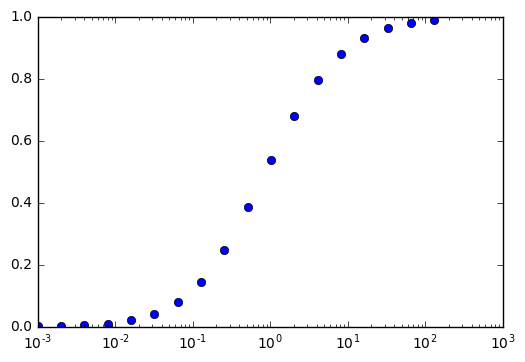

In [188]:
plt.semilogx(ligs,nubar,'o')

In [196]:
np.random.seed(16456)
berb = [np.random.normal(1.0,0.063,18)*nubar for i in range(5)]

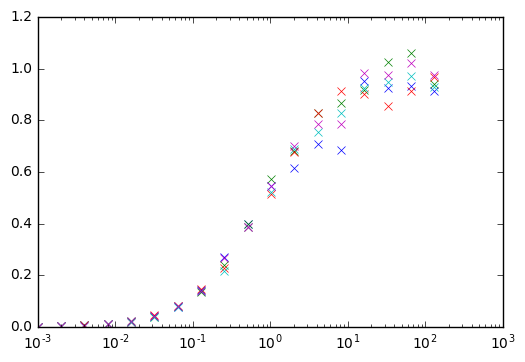

In [197]:
for i in range(len(berb)):
    plt.semilogx(ligs,berb[i],'x')

In [198]:
nubmen = (berb[0] + berb[1] + berb[2] + berb[3] + berb[4])/5

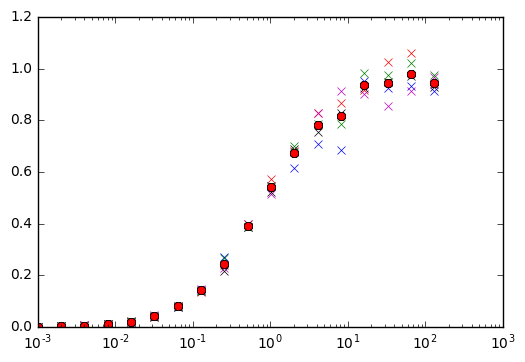

In [199]:
for i in range(len(berb)):
    plt.semilogx(ligs,berb[i],'x')
    plt.semilogx(ligs,nubmen,'o')

In [ ]:
sigma = np.sqrt(np.sum(((berb - nubmen)**2),0)/5)

In [201]:
np.sum(berb,0)

array([ 0.00687522,  0.01366594,  0.02672508,  0.05264902,  0.10329706,
        0.20402155,  0.40038488,  0.70483245,  1.22013045,  1.95781799,
        2.70128004,  3.36279045,  3.90155217,  4.08076176,  4.67537241,
        4.7207046 ,  4.89724201,  4.72325906])

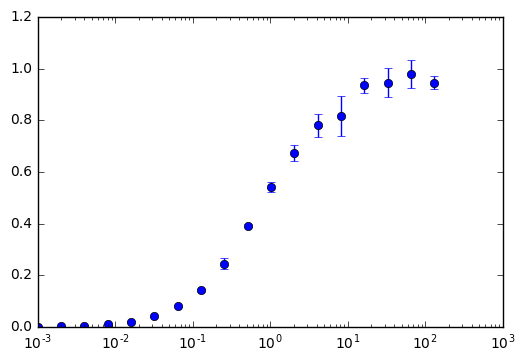

In [202]:
plt.errorbar(ligs, nubmen, yerr=sigma, linestyle='', marker='o')
plt.xscale('log')

In [203]:
sigma

array([  6.70945496e-05,   1.25004413e-04,   4.70355749e-04,
         7.74858354e-04,   1.14263147e-03,   2.55592257e-03,
         2.23949751e-03,   4.96354152e-03,   2.17736312e-02,
         5.09793877e-03,   1.97856012e-02,   2.97292630e-02,
         4.53309195e-02,   7.77072427e-02,   2.91050601e-02,
         5.61117675e-02,   5.48830956e-02,   2.46337805e-02])

In [204]:
np.average(sigma/nubmen) #relative percent sd

0.052571494609949559

In [128]:
np.std(sigma/nubmen)

0.019848291118420514

In [129]:
np.random.normal(0.05,0.01,20)

array([ 0.04201298,  0.06609566,  0.04117599,  0.05282919,  0.04011159,
        0.05936854,  0.03382805,  0.05171535,  0.04003877,  0.06572433,
        0.06154818,  0.02916164,  0.05744891,  0.05626687,  0.05955239,
        0.04852685,  0.05307916,  0.05228899,  0.06016528,  0.04402991])

In [207]:
a = np.random.normal(1.00,0.05,10000000)

In [208]:
b = 1 - a

In [209]:
np.average(np.abs(b))

0.039897039173639993

In [210]:
np.std(np.abs(b))

0.030136687765577656

In [174]:
a[1:30]

array([ 0.89051773,  1.0663125 ,  0.97339036,  0.96849026,  1.06250941,
        1.02799643,  1.02613128,  1.0441974 ,  0.95929131,  1.024288  ,
        0.96150345,  0.98187901,  1.08616235,  1.00726558,  0.94875214,
        0.98057271,  1.00654546,  0.97930952,  1.08157387,  0.89435596,
        0.94943603,  1.00666655,  0.92921979,  1.03308465,  1.01102908,
        1.02388904,  1.08536703,  1.07920985,  1.02372821])

In [177]:
np.histogram2d(np.abs(b))

TypeError: histogram2d() missing 1 required positional argument: 'y'

(array([  7.80000000e+01,   6.15400000e+03,   1.49196000e+05,
          1.24070500e+06,   3.57572100e+06,   3.60143300e+06,
          1.26608100e+06,   1.54108000e+05,   6.42800000e+03,
          9.60000000e+01]),
 array([-0.3389028 , -0.2712136 , -0.20352439, -0.13583519, -0.06814599,
        -0.00045678,  0.06723242,  0.13492162,  0.20261083,  0.27030003,
         0.33798923]),
 <a list of 10 Patch objects>)

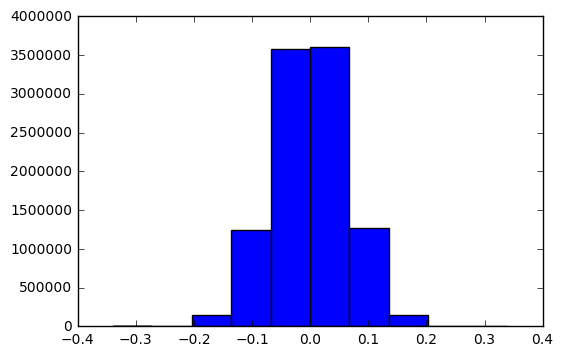

In [179]:
plt.hist(b)

In [189]:
a = np.random.normal(1.00,0.063,10000000)

(array([  1.50000000e+01,   1.33600000e+03,   5.50920000e+04,
          7.11442000e+05,   2.97403700e+06,   4.09578100e+06,
          1.86881500e+06,   2.79839000e+05,   1.34240000e+04,
          2.19000000e+02]),
 array([ 0.63136553,  0.70104852,  0.77073152,  0.84041452,  0.91009751,
         0.97978051,  1.0494635 ,  1.1191465 ,  1.18882949,  1.25851249,
         1.32819548]),
 <a list of 10 Patch objects>)

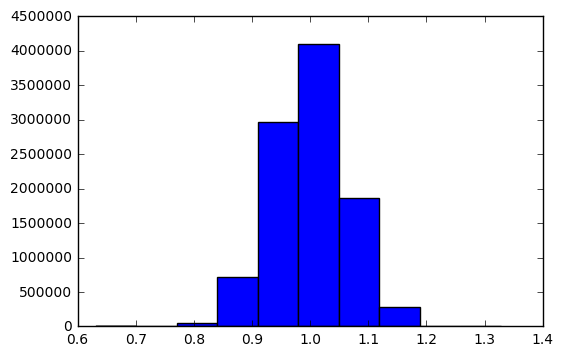

In [190]:
plt.hist(a)

In [195]:
np.average(np.random.uniform(0.95,1.05,1000))

0.99961712951188952

In [213]:
a = np.random.randn(10)
b = np.abs(a)

In [214]:
a

array([ 1.26009726, -0.48211608, -1.61298524,  0.85548622,  1.29273014,
        0.29208695, -0.68193485, -0.86635293, -1.27687145, -0.75048894])

In [215]:
b

array([ 1.26009726,  0.48211608,  1.61298524,  0.85548622,  1.29273014,
        0.29208695,  0.68193485,  0.86635293,  1.27687145,  0.75048894])

In [216]:
a/b

array([ 1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.])

In [217]:
uni = np.random.rand(1000)

In [219]:
xi = np.arange(1000)

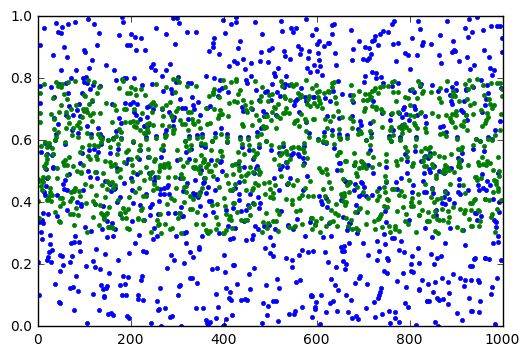

In [224]:
plt.plot(xi,uni,'.')
plt.plot(xi,(0.3 + uni*0.5),'.')

In [225]:
noise_un = 0.05 * np.random.rand(100)

In [226]:
nubar

array([ 0.00136943,  0.00273433,  0.00545065,  0.01083001,  0.0213806 ,
        0.04168745,  0.0794006 ,  0.14506012,  0.24774887,  0.38522666,
        0.53808452,  0.68052705,  0.7957575 ,  0.87872528,  0.93237661,
        0.96397807,  0.98135685,  0.99050848])

In [231]:
a = np.random.randn(18)
updn = a/np.abs(a)
updn * 0.05 * np.random.rand(18)

array([ 0.00559012,  0.01567861, -0.0348804 , -0.01507874,  0.00207099,
       -0.04802535,  0.00066269, -0.03729168, -0.02718476, -0.01571012,
       -0.02483145,  0.00338986, -0.03815968, -0.01527044, -0.04792537,
       -0.02132415, -0.01164523, -0.01664015])

In [236]:
hold_updn = []
for i in range(5):
    a = np.random.randn(18)
    updn = a/np.abs(a)
    hold_updn.append(updn)

In [253]:
hold_unoise = []
for i in range(5):
    hold_unoise.append(0.025 + 0.05*np.random.rand(18))

In [254]:
hold_unoise

[array([ 0.04488598,  0.06387463,  0.04868337,  0.03937642,  0.05905795,
         0.03917466,  0.05183541,  0.07412451,  0.03855454,  0.02886835,
         0.03201034,  0.05665325,  0.06121887,  0.05404777,  0.03405294,
         0.04905424,  0.0361637 ,  0.05237041]),
 array([ 0.0608106 ,  0.03681916,  0.04439314,  0.04199499,  0.040715  ,
         0.0584864 ,  0.03730635,  0.06035864,  0.07049029,  0.03735425,
         0.03156527,  0.03207134,  0.04906543,  0.03028178,  0.05475499,
         0.03003839,  0.04591144,  0.05274535]),
 array([ 0.07242514,  0.06578606,  0.06280959,  0.06785304,  0.06343728,
         0.04816319,  0.05253279,  0.05718928,  0.04371287,  0.03739682,
         0.04634719,  0.03218775,  0.05507856,  0.04536287,  0.06558746,
         0.03260037,  0.07037946,  0.06795554]),
 array([ 0.07296685,  0.05414754,  0.06012306,  0.04174024,  0.06852349,
         0.05761143,  0.03269169,  0.05804798,  0.04480475,  0.05215784,
         0.04690254,  0.0333198 ,  0.0529825 ,  0.

In [255]:
type(nubar)

numpy.ndarray

In [256]:
unar = np.array(hold_unoise)

In [257]:
updar = np.array(hold_updn)

In [258]:
bind_uninoise = (unar*updar*nubar + nubar)

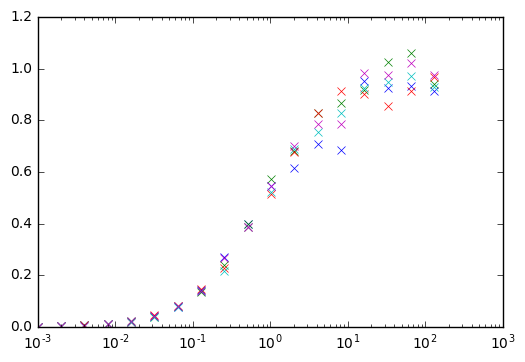

In [259]:
for i in range(len(berb)):
    plt.semilogx(ligs,berb[i],'x')

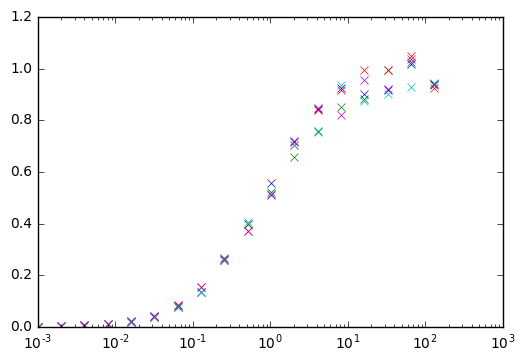

In [260]:
for i in range(len(berb)):
    plt.semilogx(ligs,bind_uninoise[i],'x')

In [252]:
np.average(0.025 + uni*0.05)

0.049872565186671887

In [263]:
purebind = np.array([nubar for i in range(5)])

In [264]:
purebind.size

90

In [265]:
bind_uninoise.size

90

In [269]:
np.std((np.abs(purebind - bind_uninoise))/purebind)

0.012724556794042444

In [270]:
nubar

array([ 0.00136943,  0.00273433,  0.00545065,  0.01083001,  0.0213806 ,
        0.04168745,  0.0794006 ,  0.14506012,  0.24774887,  0.38522666,
        0.53808452,  0.68052705,  0.7957575 ,  0.87872528,  0.93237661,
        0.96397807,  0.98135685,  0.99050848])